In [1]:
import numpy as np
from numpy.lib.stride_tricks import as_strided
from PIL import Image
from matplotlib import pyplot as plt

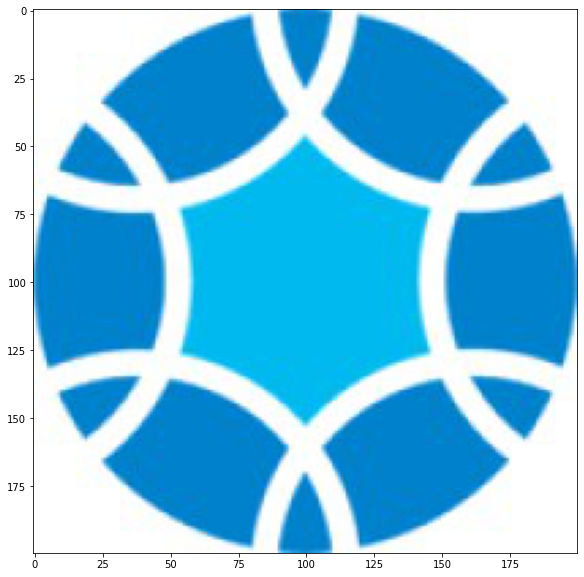

In [16]:
img = np.asarray(Image.open('linker.jpg'))
plt.figure(figsize=(10,10))
plt.imshow(img)

In [3]:
def nonOverlappingPatches(img,size):
    H,W,C = img.shape
    rows,cols = H//size, W//size
    #row,col,patch_row,patch_col,C
    patches = np.zeros((rows,cols,size,size,C))
    for i in range(rows):
        for j in range(cols):
            patches[i,j,::]=img[size*i:size*(i+1),size*j:size*(j+1),:]
    return patches

In [4]:
%%timeit
patches = nonOverlappingPatches(img,50)

85.6 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
def strideTrickPatches(img,size):
    H,W,C = img.shape
    shape =  [H//size, W//size] + [size,size,C]
    #(row,col,patch_row,patch_col)
    strides = [size*s for s in img.strides[:2]] +list(img.strides)
    # extract
    return as_strided(img,shape=shape,strides=strides)

In [59]:
def strideTrickPatches_overlap(img,size,step_ratio):
    H,W,C = img.shape
    step = size*step_ratio
    assert step.is_integer()
    step = int(step)
    shape =  [H//step, W//step] + [size,size,C]
    #(row,col,patch_row,patch_col)
    strides = [step*s for s in img.strides[:2]] +list(img.strides)
    # extract
    return as_strided(img,shape=shape,strides=strides)

In [62]:
# %%timeit
patches = strideTrickPatches_overlap(img,50,0.8)

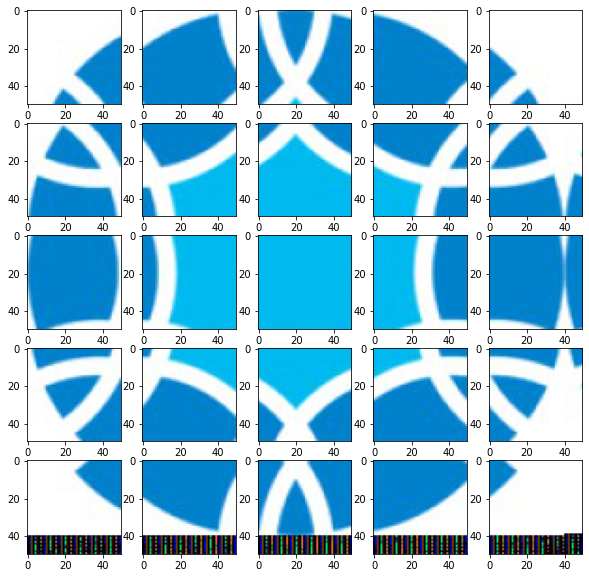

In [63]:
N=len(patches)
fig,axs = plt.subplots(N,N,figsize=(10,10))
for ii in range(N*N):
    axs[ii//N][ii%N].imshow(patches[ii//N][ii%N])

In [10]:
img.T.flags['C_CONTIGUOUS']

False

In [11]:
tmp = np.array(range(12),dtype=np.int8).reshape(3,4).T
print( f'Contiguous: {tmp.flags.c_contiguous}\n\
Shape: {tmp.shape}\n\
Strides: {tmp.strides}\n\
Itemsize {tmp.itemsize}')

Contiguous: False
Shape: (4, 3)
Strides: (1, 4)
Itemsize 1


In [12]:
tmp = np.array(range(12),dtype=np.float32).reshape(3,4)
print( f'Contiguous: {tmp.flags.c_contiguous}\n\
Shape: {tmp.shape}\n\
Strides: {tmp.strides}\n\
Itemsize {tmp.itemsize}')

Contiguous: True
Shape: (3, 4)
Strides: (16, 4)
Itemsize 4


In [30]:
def strideTrickPatches2d(img,size):
    H,W = img.shape
    #(2,2,2,2)
    shape =  [H//size, W//size] + [size,size]
    #(row,col,patch_row,patch_col)
    # (8,4,2,1)
    strides = [size*s for s in img.strides] +list(img.strides)
    # extract
    return as_strided(img,shape=shape,strides=strides)

In [31]:
tmp = np.asarray(range(16)).reshape(4,4)
[print(tmp)]
strideTrickPatches2d(tmp,2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[[[ 0,  1],
         [ 4,  5]],

        [[ 2,  3],
         [ 6,  7]]],


       [[[ 8,  9],
         [12, 13]],

        [[10, 11],
         [14, 15]]]])

In [35]:
def strideTrickPatches2d_overlap(img,size,step_ratio):
    H,W = img.shape
    step = size*step_ratio
    assert step.is_integer()
    step = int(step)
    shape =  [H//step, W//step] + [size,size]
    #(row,col,patch_row,patch_col)
    strides = [step*s for s in img.strides] +list(img.strides)
    # extract
    return as_strided(img,shape=shape,strides=strides)

In [36]:
tmp = np.asarray(range(16)).reshape(4,4)
[print(tmp)]
strideTrickPatches2d_overlap(tmp,2,0.5)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[[[ 0,  1],
         [ 4,  5]],

        [[ 1,  2],
         [ 5,  6]],

        [[ 2,  3],
         [ 6,  7]],

        [[ 3,  4],
         [ 7,  8]]],


       [[[ 4,  5],
         [ 8,  9]],

        [[ 5,  6],
         [ 9, 10]],

        [[ 6,  7],
         [10, 11]],

        [[ 7,  8],
         [11, 12]]],


       [[[ 8,  9],
         [12, 13]],

        [[ 9, 10],
         [13, 14]],

        [[10, 11],
         [14, 15]],

        [[11, 12],
         [15,  0]]],


       [[[12, 13],
         [ 0,  1]],

        [[13, 14],
         [ 1,  2]],

        [[14, 15],
         [ 2,  3]],

        [[15,  0],
         [ 3,  4]]]])